In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
join = os.path.join

In [62]:
# Load data files
root_path = "./../data/tmp"
df_video = pd.read_csv(join(root_path, "baseline1_final.csv"), sep='\t')
df_channel = pd.read_csv(join(root_path, "baseline_final_channels.csv"), sep='\t')

In [8]:
df_video.head()

,caption,title,label,video_id
0,it happened outside waco texas a heavily armed...,the shadow of waco retro report the new york...,0,hOW9AjskoOo
1,thanks for coming its nice to see a good turno...,former abortionist dr levatino destroys procho...,0,dIRcw45n9RU
2,tonight i donald john trump do solemnly swear...,trumps road to the white house full film fron...,0,SMwXKl0odq8
3,this week on buzzfeed unsolved we discuss the...,the strange disappearance of db cooper,0,oHSehKtDyoI
4,im mason noise im 22 and im from birmingham wh...,shockingly offensive auditions have simon cowe...,0,N9COy7O7K-U


In [9]:
df_channel.head()

,channel_id,video_ids
0,UCqnbDFdCpuN8CMEg0VuEBqA,"hOW9AjskoOo,uJ44spUo8Uk,-O_DMyHdq_M,U_hbIPJuia..."
1,UCfkzsfj7Go1Q_kRFZmJptsw,dIRcw45n9RU
2,UC3ScyryU9Oy9Wse3a8OAmYQ,"SMwXKl0odq8,AW0gsP3EgDI"
3,UCKijjvu6bN1c-ZHVwR7-5WA,"oHSehKtDyoI,lDeFSOUHdH4,cDZweMXXY6Y,p2EUZ-gwe6..."
4,UC6my_lD3kBECBifeq0n2mdg,"N9COy7O7K-U,DHwpwD-ae7I,74fTHh6jB5Q"


In [66]:
# note: hardcoded
TOPICS = ["9/11", "chemtrails", "flatearth", "moonlanding", "vaccines"]
TOPIC_LIMITS = [0, 430, 901, 1214, 1530, 2120]

### Count (overall / by topic)

In [20]:
# Number of videos, channels

videos = df_video["video_id"].to_list()
print("Num videos (total) =", len(videos))
for i in range(len(TOPICS)):
    print("Num videos for", TOPICS[i], "=", TOPIC_LIMITS[i + 1] - TOPIC_LIMITS[i])

channels = df_channel["channel_id"].to_list()
vids_by_channel = df_channel["video_ids"].to_list()
print("Num channels (total) =", len(vids_by_channel))
for i in range(len(TOPICS)):
    video_i = videos[TOPIC_LIMITS[i]:TOPIC_LIMITS[i + 1]]
    count = 0
    c_set = set()
    for v in video_i:
        for (c, v2) in zip(channels, vids_by_channel):
            if v in v2:
                c_set.add(c)
                break
    print("Num channels for", TOPICS[i], "=", len(c_set))

Num videos (total) = 2120
Num videos for 9/11 = 430
Num videos for chemtrails = 471
Num videos for flatearth = 313
Num videos for moonlanding = 316
Num videos for vaccines = 590
Num channels (total) = 884
Num channels for 9/11 = 213
Num channels for chemtrails = 297
Num channels for flatearth = 155
Num channels for moonlanding = 210
Num channels for vaccines = 243


In [68]:
# Number of misinfo channels

videos = df_video["video_id"].to_list()

for i in range(len(TOPICS)):
    video_i = videos[TOPIC_LIMITS[i]:TOPIC_LIMITS[i + 1]]
    df_sub = df_video[df_video["video_id"].isin(video_i)]
    video_misinfo = df_sub[df_sub["label"] == 1]["video_id"].to_list()
    
    count = 0
    for vid_ids in df_channel["video_ids"]:
        l = vid_ids.split(",")
        for k in l:
            if k in video_misinfo:
                count += 1
                break
    print("For", TOPICS[i], "=", count, "misinfo channels")

For 9/11 = 27 misinfo channels
For chemtrails = 113 misinfo channels
For flatearth = 12 misinfo channels
For moonlanding = 18 misinfo channels
For vaccines = 18 misinfo channels


In [21]:
# Breakdown by class label

labels = df_video["label"].to_numpy()
misinfo = np.count_nonzero(labels == 1)
nonmisinfo = labels.shape[0] - misinfo
print("Overall:", misinfo, "misinfo,", nonmisinfo, "nonmisinfo")
for i in range(len(TOPICS)):
    labels_i = labels[TOPIC_LIMITS[i]:TOPIC_LIMITS[i + 1]]
    misinfo = np.count_nonzero(labels_i == 1)
    nonmisinfo = labels_i.shape[0] - misinfo
    print("For", TOPICS[i], "=", misinfo, "misinfo,", nonmisinfo, "nonmisinfo")

Overall: 249 misinfo, 1871 nonmisinfo
For 9/11 = 48 misinfo, 382 nonmisinfo
For chemtrails = 131 misinfo, 340 nonmisinfo
For flatearth = 20 misinfo, 293 nonmisinfo
For moonlanding = 21 misinfo, 295 nonmisinfo
For vaccines = 29 misinfo, 561 nonmisinfo


### Compute mean/std/min/max

In [22]:
# Number of videos per channel
counts = []
for vid_ids in df_channel["video_ids"]:
    counts += [len(vid_ids.split(","))]
counts = np.array(counts)
print("Number of videos per channel (mean,std,min,max):")
counts.mean(), counts.std(), counts.min(), counts.max()

Number of videos per channel (mean,std,min,max):


(2.3891402714932126, 4.220738465898886, 1, 48)

In [23]:
# Number of tokens per caption
counts = []
for caption in df_video["caption"]:
    counts += [len(caption.split(" "))]
counts = np.array(counts)
print("Number of tokens per caption (mean,std,min,max):")
counts.mean(), counts.std(), counts.min(), counts.max()

Number of tokens per caption (mean,std,min,max):


(2616.7466981132075, 3005.3027773386934, 1, 27496)

Proportion of misinfo videos per channel (mean,std,min,max):
0.4259378628943846 0.30812635678121475 0.043478260869565216 1.0
Number of pairs: 666


(array([258., 125., 150.,  85.,  48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

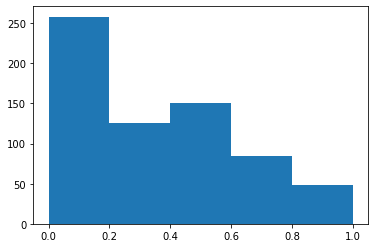

In [60]:
# Proportion of misinfo videos for channels with misinfo
# Needs to have 3+ videos
video_list = df_video["video_id"].to_list()
video_misinfo = df_video[df_video["label"] == 1]["video_id"].to_list()
p = []
for vid_ids in df_channel["video_ids"]:
    l = vid_ids.split(",")
    t = 0
    n = 0
    for k in l:
        if k in video_list:
            n += 1
        if k in video_misinfo:
            t += 1
    if n < 3 or t == 0:
    #if n < 3:
        continue
    p += [t / n]
p = np.array(p)
print("Proportion of misinfo videos per channel (mean,std,min,max):")
print(p.mean(), p.std(), p.min(), p.max())
#plt.hist(p, bins=[i * 0.1 for i in range(11)])
q = []
for i, x in enumerate(p):
    for j, y in enumerate(p[i+1:]):
        q += [abs(x - y)]
    #for j, y in enumerate(p):
        #if i != j and x == 0 and y > 0.0:
        #    q += [abs(x - y)]
print("Number of pairs:", len(q))
plt.hist(q, bins=[i * 0.2 for i in range(6)])

In [65]:
# Number of misinfo videos (all channels)
video_list = df_video["video_id"].to_list()
video_misinfo = df_video[df_video["label"] == 1]["video_id"].to_list()
p = []
for vid_ids in df_channel["video_ids"]:
    l = vid_ids.split(",")
    t = 0
    for k in l:
        if k in video_misinfo:
            t += 1
    p += [t]
p = np.array(p)
print("Number of misinfo videos per channel (mean,std,min,max):")
print(p.mean(), p.std(), p.min(), p.max())
print("Number of channels with at least one misinformation video:")
print(np.count_nonzero(p))

Number of misinfo videos per channel (mean,std,min,max):
0.27714932126696834 0.7206539390547344 0 10
Number of channels with at least one misinformation video:
180


### Other relevant statistics

In [25]:
# Number of videos per channel (more detailed)
counts = {}
for _, row in df_channel.iterrows():
    vid_ids = row["video_ids"].split(',')
    counts[len(vid_ids)] = counts.get(len(vid_ids), 0) + 1
x = len(df_channel)
for i in range(1, 49):
    print("Channels with", i, "vid or more:", x)
    if i in counts.keys():
        x -= counts[i]

Channels with 1 vid or more: 884
Channels with 2 vid or more: 268
Channels with 3 vid or more: 162
Channels with 4 vid or more: 107
Channels with 5 vid or more: 86
Channels with 6 vid or more: 69
Channels with 7 vid or more: 62
Channels with 8 vid or more: 55
Channels with 9 vid or more: 48
Channels with 10 vid or more: 39
Channels with 11 vid or more: 38
Channels with 12 vid or more: 36
Channels with 13 vid or more: 32
Channels with 14 vid or more: 27
Channels with 15 vid or more: 19
Channels with 16 vid or more: 17
Channels with 17 vid or more: 15
Channels with 18 vid or more: 12
Channels with 19 vid or more: 12
Channels with 20 vid or more: 10
Channels with 21 vid or more: 9
Channels with 22 vid or more: 9
Channels with 23 vid or more: 7
Channels with 24 vid or more: 7
Channels with 25 vid or more: 7
Channels with 26 vid or more: 5
Channels with 27 vid or more: 5
Channels with 28 vid or more: 5
Channels with 29 vid or more: 5
Channels with 30 vid or more: 4
Channels with 31 vid or m

In [27]:
# Vocabulary size
vocab = set()
for caption in df_video["caption"]:
    tokens = caption.split(" ")
    for token in tokens:
        vocab.add(token)
len(vocab)

74247